# Introduction to Numpy powered by oneAPI



# Exercises:

Do a page search for each **Exercise** in this notebook. Complete all  exercises. Code in cells above each exercise may give insight into a solid approach

In [1]:

import numpy as np
from math import log10 as lg10
import time
import matplotlib.pyplot as plt
import random
import time
%matplotlib inline

# *Numpy.where* to handle simple conditional logic

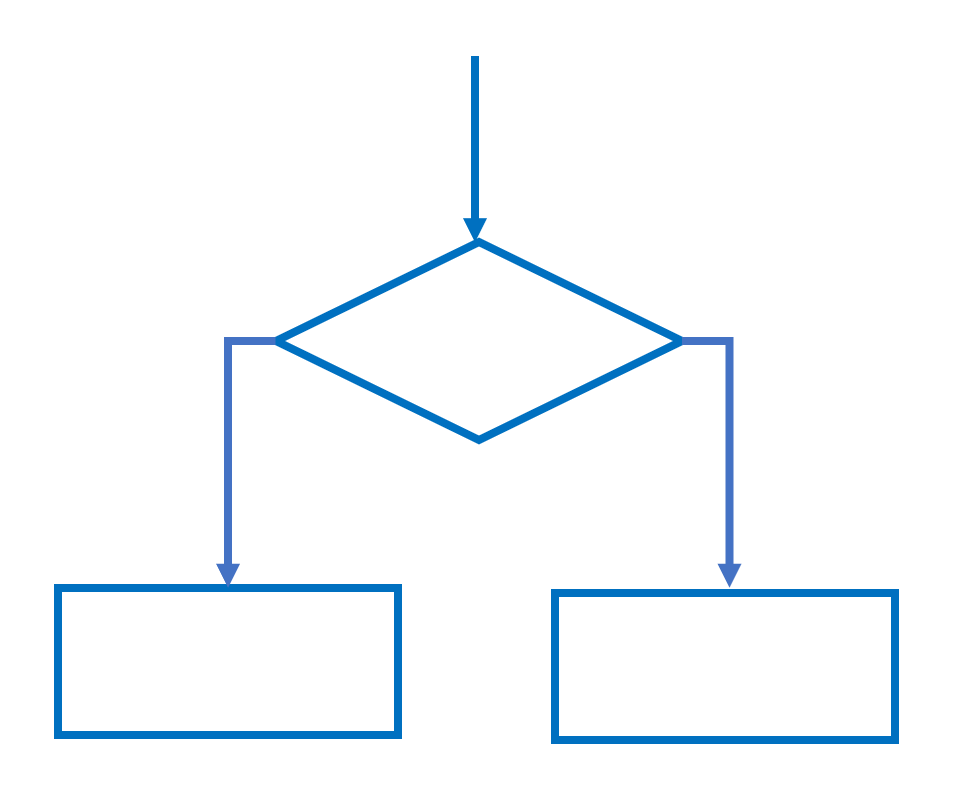

One thing that could prevent us from effectively getting vector performance when converting a loop to a vector approach is when the original loop has if then else statements in it - called conditional logic

The Numpy Where allows us  to tackle conditional loops in a fast vectorized way

Apply conditional logic to an array to create a new column orupdate contents of an existing column

**Syntax:**
- numpy.where(condition, [x, y, ]/)
- Return elements chosen from x or y depending on condition.

To understand what numpy where does, look at the simple example below
See a simple example below to add 50 to all elements currently greater than 5:

In [2]:
a = np.arange(10)
np.where(a > 5, a + 50, a )
# if a > 5 then return a + 50
# else return a

array([ 0,  1,  2,  3,  4,  5, 56, 57, 58, 59])

This could come n handy for many AI applications, but let's choose labeling data

There may be better wyas to binarize data but here is a simple example of converting conrinuous data into  categorical values

arr = **np.array([11, 1.2, 12, 13, 14, 7.3, 5.4, 12.5])**

Let's say all values 10 and above represent a medical parameter threshold that indicates further testing, while values below 10 indicate normal range

We might like to print the values as words such as 
**['More Testing', 'Normal', 'More Testing', 'More Testing', ...]**



In [3]:
arr = np.array([11, 1.2, 12, 13, 14, 7.3, 5.4, 12.5])
np.where(arr < 10, 'Normal', 'More Testing')

array(['More Testing', 'Normal', 'More Testing', 'More Testing',
       'More Testing', 'Normal', 'Normal', 'More Testing'], dtype='<U12')

or we could binarize data for use in a classifier

In [4]:
# Simple Numpy Binarizer Discretizer
# convert continous data to discrete integer bins
arr = np.array([11, 1.2, 12, 13, 14, 7.3, 5.4, 12.5])
print(np.where(arr < 6, 0, np.where(arr < 12, 1, 2)))


[1 0 2 2 2 1 0 2]


### Numpy Where to find rows and columns of conditions

Given a mask of TRUE/FALSE values, we will 
- generate  a new array with a 1 at every location TRUE is located
- generate a -1 at every location a FALSE is located

**Apply a mask**

In [5]:
#Apply a mask of True/False array to select or manipulate elements
a = np.ones((3,3))  # a contains all 1's

print("initial array a\n", a)
# Given a mask of true/ false values, we will generate 
# a new array with a 1 at every location TRUE is located
# a -1 at every location a FALSE is located
mask = [[False,True,True],[False,True,False],[True,False,True]]
print("\nmask")
for el in mask: # simple loop to print the mask
    print(el)
               
testing_array = np.where(mask,a,-a)

print("\ntesting_array\n",testing_array)

# now we can find where all the ones are by row and column
print("row index (where ones are): ",np.where(testing_array > 0)[0])
print("col index (where ones are): ",np.where(testing_array > 0)[1])

initial array a
 [[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]

mask
[False, True, True]
[False, True, False]
[True, False, True]

testing_array
 [[-1.  1.  1.]
 [-1.  1. -1.]
 [ 1. -1.  1.]]
row index (where ones are):  [0 0 1 2 2]
col index (where ones are):  [1 2 1 0 2]


This can be used the other way to **create a mask** given a conidtion or threshold

In [6]:
# create a mask for indexing, to later manipulate arrays
a = np.ones((3,3))  # a contains all 1's

print("initial array a\n", a)
               
mask = [[False,True,True],[False,True,False],[True,False,True]]
print("\nmask")
for el in mask: # simple loop to print the mask
    print(el)
    
testing_array = np.where(mask,a,-a)

print("\ntesting_array\n",testing_array)

WentTheOtherWay = np.where(testing_array > 0,True, False)

print("\nWentTheOtherWay\n",WentTheOtherWay)

# now we can find where all the ones are by row and column
print("row index (where ones are): ",np.where(WentTheOtherWay > 0)[0])
print("col index (where ones are): ",np.where(WentTheOtherWay > 0)[1])

initial array a
 [[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]

mask
[False, True, True]
[False, True, False]
[True, False, True]

testing_array
 [[-1.  1.  1.]
 [-1.  1. -1.]
 [ 1. -1.  1.]]

WentTheOtherWay
 [[False  True  True]
 [False  True False]
 [ True False  True]]
row index (where ones are):  [0 0 1 2 2]
col index (where ones are):  [1 2 1 0 2]


## Numpy.where Multiplication Table Example

Find all locations of a value in a multiplication table

Find all(rows, cols) of the value 24 a multiplication table 

In [7]:
numLine = np.arange(1, 11).reshape(10,1)
MultiplicationTable = numLine * numLine.T
MultiplicationTable
np.where( MultiplicationTable == 24)

(array([2, 3, 5, 7]), array([7, 5, 3, 2]))

# Exercise:

Find all(rows, cols) of (all **multiples of **12 or all multiples of 9) in a 10x10 multiplication table and make all other values 0. Preserve the first row and first column as readable indexes for the table as follows:

In [8]:
## one solution - preserves the indexing edges for easy checking
res = 0
res

0

## Numpy Where applied to California Housing data

In AI context, this could be applying categorical classifier to otherwise continuous values. For example, california hosugin dataset the target price varibale is continuous.

## Fictitious scenario

A new stimulous package is considered whereby new house buyers will be given a couon worth 50,000 off toward purchase of hosues in California whose price (prior to coupon) is between 250,0000 and 350,000. Other prices will be unaffected. Generate array with the adjusted targets


time elapsed:  0.013385295867919922


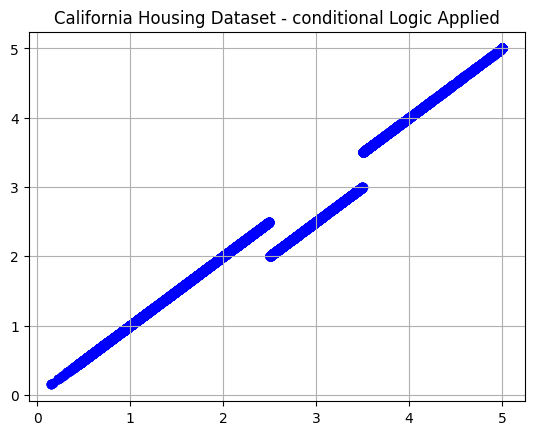

In [9]:
# Ficticious scenario:
from sklearn.datasets import fetch_california_housing

california_housing = fetch_california_housing(as_frame=True)
X = california_housing.data.to_numpy()
buyerPriceRangeLo = 250_000/100_000
buyerPriceRangeHi= 350_000/100_000
T = california_housing.target.to_numpy() 
t1 = time.time()
timing = {}
New = np.empty_like(T)
for i in range(len(T)):
    if ( (T[i] < buyerPriceRangeHi) & (T[i] >= buyerPriceRangeLo) ):
        New[i] = T[i] - 50_000/100_000
    else:
        New[i] = T[i]
t2 = time.time()
plt.title( "California Housing Dataset - conditional Logic Applied")
plt.scatter(T, New, color = 'b')
plt.grid()
print("time elapsed: ", t2-t1)
timing['Loop'] = t2-t1

## Excercise:

Duplicate the above condition using a Numpy.Where 

time elapsed:  0.0010714530944824219
Speedup: 12.5X


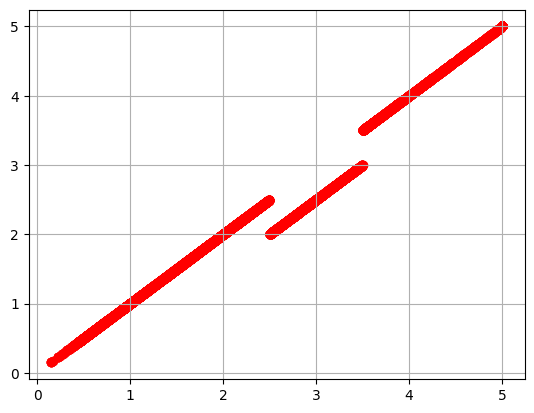

In [10]:
t1 = time.time()
#############################################################################
### Exercise: Addone moddify code below to compute same results as above loop
#New = np.where(() & (), (), ()) 
New = np.where((T < buyerPriceRangeHi) & (T >= buyerPriceRangeLo), T - 50_000/100_000, T ) 

##############################################################################
t2 = time.time()

plt.scatter(T, New, color = 'r')
plt.grid()
print("time elapsed: ", t2-t1)
timing['np.where'] = t2-t1
print("Speedup: {:4.1f}X".format( timing['Loop']/timing['np.where']))

As you can see, we generated the same data with Numpy where as we did woth the original loop but we did so 13X faster (the speedup amount may vary a bit)

# Numpy Select to handle conditional logic


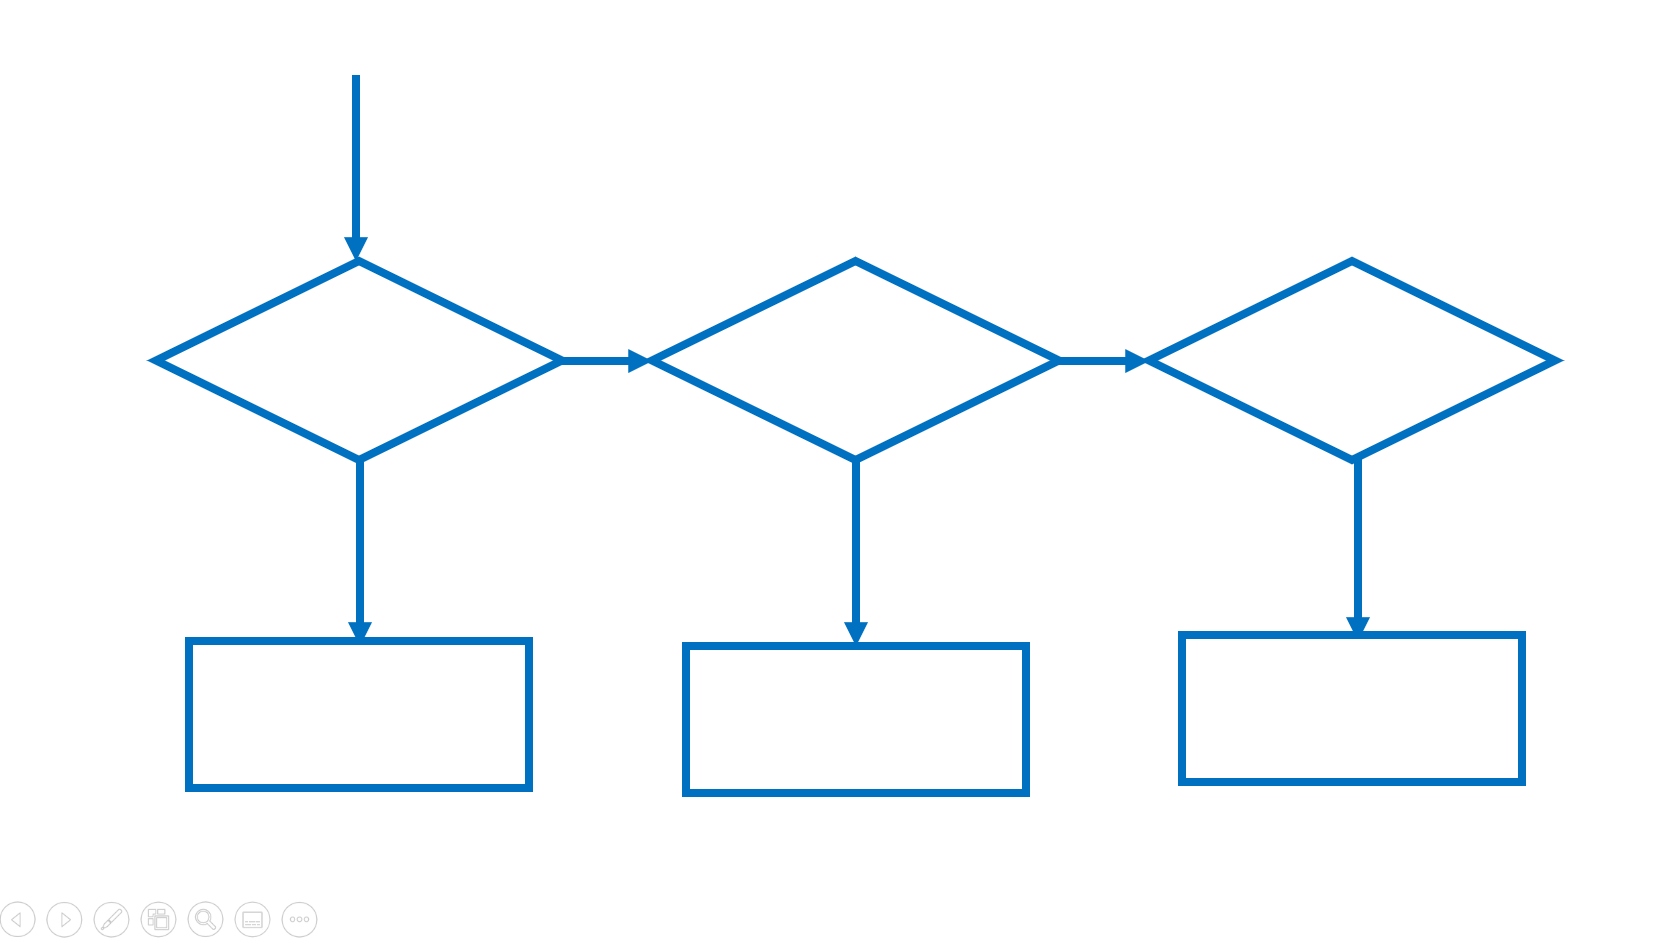

Apply conditional logic to an array to create a new column orupdate contents of an existing column. This method handles more complex conditional sceanrios than numpy where.

**Syntax:**
- [numpy.select(condlist, choicelist, default=0)[source]
- Return an array drawn from elements in choicelist, depending on conditions.

function return an array drawn from elements in choicelist, depending on conditions.

This is very useful function for handing conditionals that otherwise slow down and map or apply, or else add complexity in reading the code

First we will create some new data


In [11]:
import numpy as np
import time

BIG = 10_000_000

np.random.seed(2022)
A = np.random.randint(0, 11, size=(BIG, 6))

Find Large loop iteration loop2

If they contain conditional logic:
- consider np.where or np.select

else
- Try to find a Numpy replacement using ufuncs, aggergations, etc

Below is a loop consuming 100,000 iterations, with a messy set of conditions

Look for a way to summarize these conditions using a numpy select statement if possible

# Brute Force Approach (Big Loop)

In [12]:
timing = {}
t1 = time.time()
for i in range(BIG):
    if A[i,4] == 10:
        A[i,5] =  A[i,2] * A[i,3]
    elif (A[i,4] < 10) and (A[i,4] >=5):
        A[i,5] =   A[i,2] + A[i,3]
    elif A[i,4] < 5:
        A[i,5] =   A[i,0] + A[i,1]
t2 = time.time()
baseTime = t2- t1
print(A[:5,:])
print("time: ", baseTime)
timing['Naive Loop'] = t2 - t1

[[ 0  1  1  0  7  1]
 [ 2  8  0  5  9  5]
 [ 3  8  0  3  6  3]
 [ 0 10 10  1  2 10]
 [ 5  7  5  1  7  6]]
time:  13.3174147605896


# Try Vectorizing with masks 

Just remove the references to i and remove the loop, create mask for each condition


In [13]:
# Try Vectorizing simply
t1 = time.time()
mask1 = A[:,4] == 10
A[mask1,5] =  A[mask1,2] * A[mask1,3]
mask2 = ((A[:,4].any() < 10) and (A[:,4].any() >=5))
A[mask2,5] =   A[mask2,2] + A[mask2,3]
mask3 = A[:,4].any() < 5
A[mask3,5] =   A[mask3,0] + A[mask3,1]
t2 = time.time()
print(A[:5,:])
print("time :", t2-t1)

fastest_time = t2-t1
Speedup = baseTime / fastest_time
print("Speed up: {:4.0f} X".format(Speedup))
timing['Vector Masks'] = t2 - t1

[[ 0  1  1  0  7  1]
 [ 2  8  0  5  9  5]
 [ 3  8  0  3  6  3]
 [ 0 10 10  1  2 10]
 [ 5  7  5  1  7  6]]
time : 0.27277231216430664
Speed up:   49 X


# Try Vectorizing with select

### Much cleaner logic

put condition inside a list of tuples
put execution choice inside a list of tuples
result = np.select(condition, choice, default)


In [14]:
# np.select(condlist, choicelist, default=0)
t1 = time.time()

condition = [ (A[:,4]  < 10) & (A[:,4] >= 5),
              ( A[:,4] < 5)]
choice = [ (A[:,2] + A[:,3]), 
           (A[:,0] + A[:,1] ) ]
default = [(A[:,2] * A[:,3])]
A[:,5] = np.select(condition, choice, default= default )

t2 = time.time()
print(A[:5,:])
print("time :", t2-t1)
fastest_time = t2-t1
Speedup = baseTime / fastest_time
print("Speed up: {:4.0f} X".format(Speedup))
timing['Numpy Select'] = t2 - t1

[[ 0  1  1  0  7  1]
 [ 2  8  0  5  9  5]
 [ 3  8  0  3  6  3]
 [ 0 10 10  1  2 10]
 [ 5  7  5  1  7  6]]
time : 0.5459802150726318
Speed up:   24 X


<BarContainer object of 3 artists>

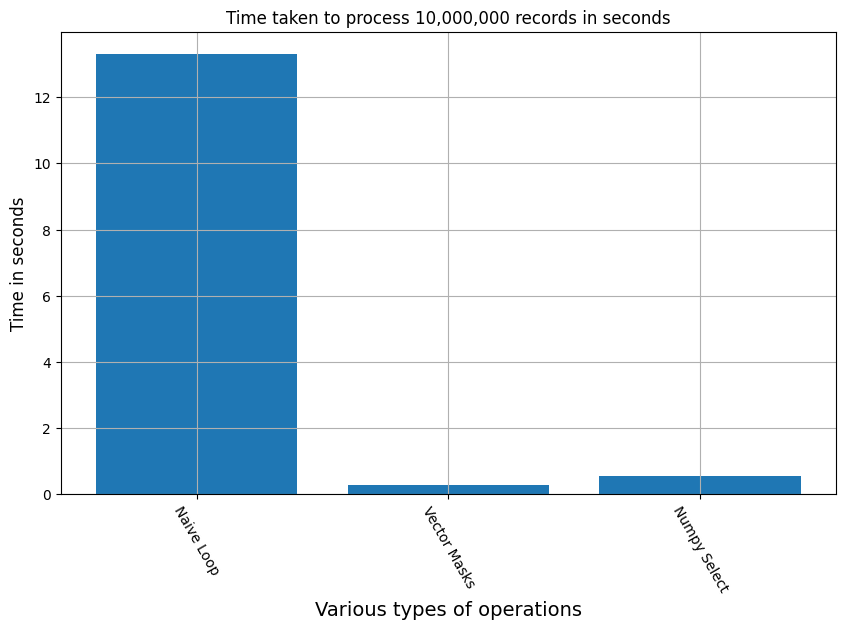

In [15]:
plt.figure(figsize=(10,6))
plt.title("Time taken to process {:,} records in seconds".format(BIG),fontsize=12)
plt.ylabel("Time in seconds",fontsize=12)
plt.xlabel("Various types of operations",fontsize=14)
plt.grid(True)
plt.xticks(rotation=-60)
plt.bar(x = list(timing.keys()), height= list(timing.values()), align='center',tick_label=list(timing.keys()))

## Exercise: Numpy Select

Find all(rows, cols) of (all multiples of 12, 15, 21) in a multiplication table and make all other values 0 using numpy select

In [16]:
# numpy.select(condlist, choicelist, default)
numLine = np.arange(1, 11).reshape(10,1)
multT = numLine * numLine.T

# condition = [(), (), ()]
# choice = [(), (), ()]
# default =[()]
# res = np.select(condition, choice, default)

# res[0,:] = MultiplicationTable[0,:]  # put edges back in to check result
# res[:,0] = MultiplicationTable[:,0]  # put edges back in to check result
# res

In [17]:
# numpy.select(condlist, choicelist, default=0)
# same example but display the edges as integer sequence
#res = np.where( MultiplicationTable%12 == 0, MultiplicationTable, 0)

numLine = np.arange(1, 11).reshape(10,1)
multT = numLine * numLine.T

condition = [(multT%12 == 0), (multT%15 == 0), (multT%21 == 0)]
choice = [(multT), (multT), (multT)]
default =[(0)]

res = np.select(condition, choice, default)
# res[0,:] = MultiplicationTable[0,:]  # put edges back in to check result
# res[:,0] = MultiplicationTable[:,0]  # put edges back in to check result
res

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 12,  0,  0,  0,  0],
       [ 0,  0,  0, 12, 15,  0, 21, 24,  0, 30],
       [ 0,  0, 12,  0,  0, 24,  0,  0, 36,  0],
       [ 0,  0, 15,  0,  0, 30,  0,  0, 45,  0],
       [ 0, 12,  0, 24, 30, 36, 42, 48,  0, 60],
       [ 0,  0, 21,  0,  0, 42,  0,  0, 63,  0],
       [ 0,  0, 24,  0,  0, 48,  0,  0, 72,  0],
       [ 0,  0,  0, 36, 45,  0, 63, 72,  0, 90],
       [ 0,  0, 30,  0,  0, 60,  0,  0, 90,  0]])

# List of days

Goal: grab subset of data for weekend days into a numpy array

Demonstrate approach using slicing as wellas np.where()

In [18]:
import numpy as np
# create simple array of data with days info
a = np.array([i for i in range(21)])
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20])

In [19]:
# skip count by 7 starting on day 0
a[3::7]

array([ 3, 10, 17])

In [20]:
# skip count by 7 starting on day 1
a[4::7]

array([ 4, 11, 18])

In [21]:
start = 3
blist = list(zip(a[start::7],a[start+1::7]))
blist

[(3, 4), (10, 11), (17, 18)]

# Here is list of all the weekend days

In [22]:
np.array(blist).flatten()

array([ 3,  4, 10, 11, 17, 18])

In [23]:
idx = np.where((a%7==3) | (a%7==4))
a[idx]

array([ 3,  4, 10, 11, 17, 18])

In [24]:
print("Done")

Done
